In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#import imutils

In [5]:
nSign = 3
img = cv2.imread("DTUSignPhotos/DTUSigns{0:03d}.jpg".format(nSign))
lm = np.loadtxt("DTUSignPhotos/DTUSigns{0:03d}.txt".format(nSign))

In [6]:
h,w,d = img.shape
label = np.zeros(shape = (h,w),dtype='int8')
nSquares = len(lm)//4
for n in range(nSquares):
    idx = n*4
    cv2.fillConvexPoly(label, np.array(lm[idx:idx+4], 'int32'), n+1)

In [7]:
print(label.shape)

(3024, 4032)


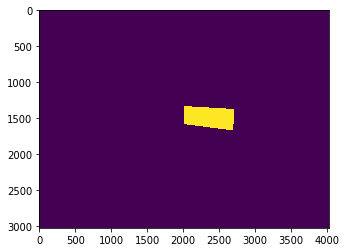

In [8]:
plt.imshow(label)

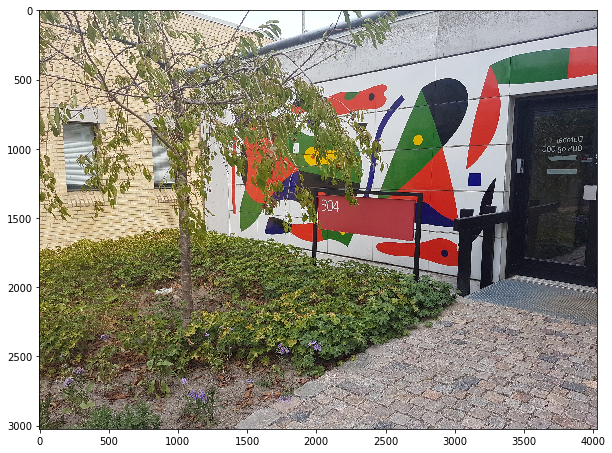

In [9]:
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.figure(figsize = (10,10))
plt.imshow(img)

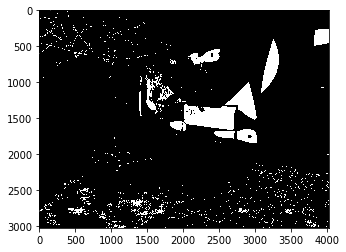

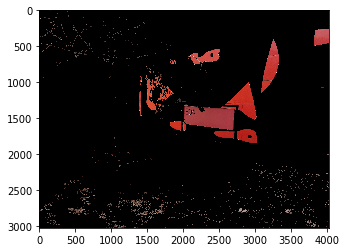

In [10]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_hsv = np.array([0, 43, 46])
upper_hsv = np.array([10, 255, 255])
mask1 = cv2.inRange(img_hsv, lowerb=lower_hsv, upperb=upper_hsv)

lower_hsv = np.array([170, 43, 46])
upper_hsv = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lowerb=lower_hsv, upperb=upper_hsv)

mask = mask1+mask2
output = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(mask, cmap='gray')
plt.figure()
plt.imshow(output)

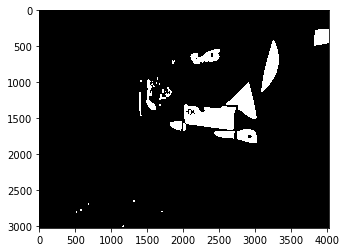

In [11]:
kernel = np.ones((5,5),np.uint8)
thresh=cv2.erode(mask, kernel, iterations = 4)
thresh=cv2.dilate(thresh, kernel, iterations = 4)

plt.imshow(thresh, cmap='gray')

In [16]:
#import imutils

In [17]:
cnts=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)

In [18]:
for cnt in cnts:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==3:
        shape_name="Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)

TypeError: Expected Ptr<cv::UMat> for argument '%s'